# Credit Card Fraud Detection
#### Author: Priala Radu-Nicusor

# Introduction

In this notebook, we will develop a machine learning model to detect fraudulent transactions in a credit card dataset.

We will use a dataset from Kaggle, which contains 284,807 transactions, out of which 492 are labeled as fraud.

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data 

After building and tuning our model, we will evaluate its performance using various metrics, including precision, recall and F1-score.

# 1) Importing libraries and data

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluation Metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc
)

Importing the dataset

In [2]:
data = pd.read_csv('creditcard.csv')

# 2) Data exploration

Let's display the first 5 rows of the dataset

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Displaying column names

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Summary statistics

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checking for missing values

In [6]:
data.isnull().sum().max()

0

#### Visualizing the Transaction Amount Distribution

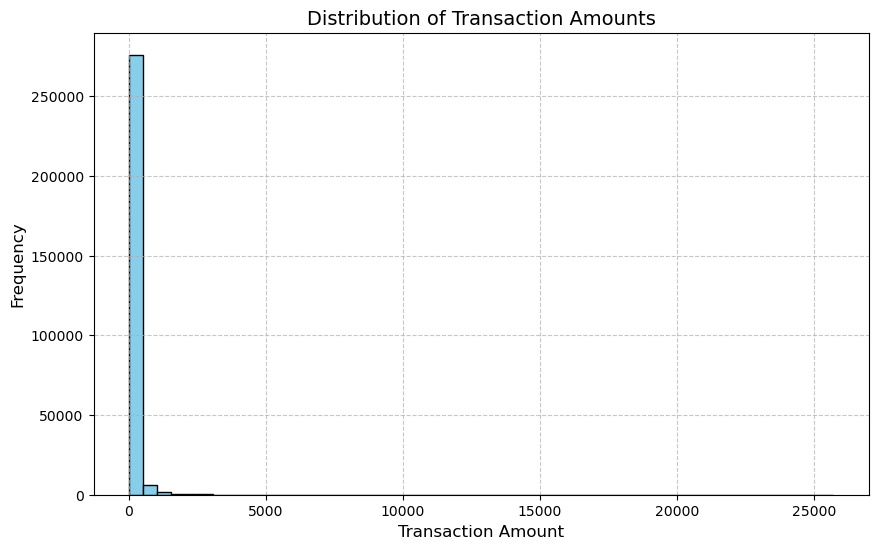

In [7]:
plt.figure(figsize=(10,6))  
plt.hist(data['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Transaction Amounts", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

#### Visualizing the Time Distribution

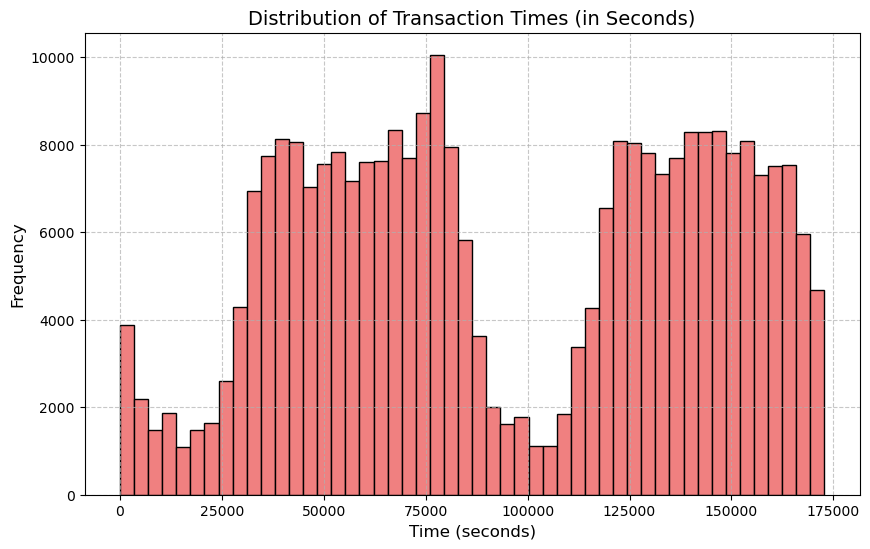

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data['Time'], bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribution of Transaction Times (in Seconds)", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.show()

# 3) DATA PREPROCESSING

Splitting Features and Target

In [9]:
X = data.drop(columns=['Class'])
y = data['Class']
print(f"Feature set shape: {X.shape}, target variable shape: {y.shape}")

Feature set shape: (284807, 30), target variable shape: (284807,)


Feature Scaling

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


Splitting Data into Training and Testing Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training Set Shape (X_train): {X_train.shape}")
print(f"Testing Set Shape (X_test): {X_test.shape}")
print(f"Training Target Shape (y_train): {y_train.shape}")
print(f"Testing Target Shape (y_test): {y_test.shape}")

Training Set Shape (X_train): (227845, 30)
Testing Set Shape (X_test): (56962, 30)
Training Target Shape (y_train): (227845,)
Testing Target Shape (y_test): (56962,)


# 4) Training and evaluating the model

Initializing XGBoost Model

In [12]:
scale_pos_weight = len(y_train) / (2 * sum(y_train))
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Correcting imbalance between classes
    random_state=42,                    # Ensuring reproducibility
    eval_metric='logloss'               # Evaluation metric for binary classification
)

Training the model

In [13]:
print("Training the model...")
xgb_model.fit(X_train, y_train)
print("Model trained successfully!")

Training the model...
Model trained successfully!


Making Predictions

In [14]:
y_pred_xgb = xgb_model.predict(X_test)

Evaluate model performance

#### Classification Report

In [15]:
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Key Findings for the report:
 - 0.85 Precision for class 1: The model is moderately accurate in identifying fraudulent transactions, but there are some false positives.
 - 0.84 Recall for class 1: The model correctly identifies 84% of all fraudulent transactions, meaning there’s a small portion of fraudulent transactions that remain undetected (false negatives).
 - 0.85 F1-Score for class 1: The balance between precision and recall is good, but there's room for improvement since the model has a slightly lower recall.

#### Confusion Matrix

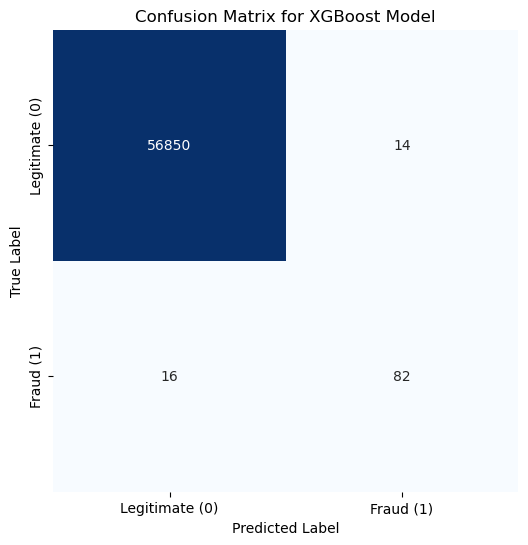

In [16]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate (0)', 'Fraud (1)'], yticklabels=['Legitimate (0)', 'Fraud (1)'])

plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

Key Findings for the report:
 - There were 56850 legitimate transactions that were correctly identified by the model (True Negatives)
 - There were 14 legitimate transactions that were incorrectly classified as fraudulent (False Positives)
 - There were 16 fraudulent transactions that were incorrectly classified as legitimate (False Negatives)
 - There were 82 fraudulent transactions that where correctly identified as fraudulent (True Positives)

To improve the model’s performance, the next step is to fine-tune the model using hyperparameter tuning. 

This will allow us to optimize the model for better generalization, reduce overfitting, and optimize its ability to detect fraudulent transactions more reliably.

# 5) Improvements with Hyperparameter Tuning

 Define Parameter Grid for RandomizedSearchCV

In [17]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

Initialize RandomizedSearchCV with XGBoost model

In [18]:
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1)

Fit the RandomizedSearchCV to the training data and print the best hyperparameters

In [19]:
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


We'll train the better model (after tuning)

In [20]:
# Train
best_xgb_model = random_search.best_estimator_

# Make predictionsl
y_pred_best_xgb = best_xgb_model.predict(X_test)

#### Classification Report

In [21]:
print("Best XGBoost Model Classification Report")
print(classification_report(y_test, y_pred_best_xgb))

Best XGBoost Model Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



#### Confusion Matrix

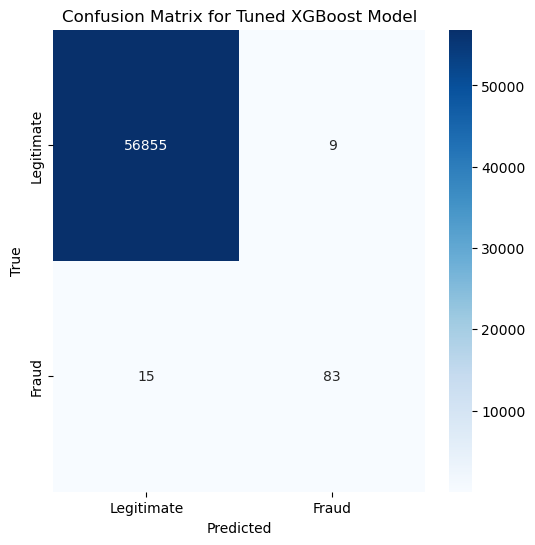

In [22]:
cm_tuned = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6,6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title("Confusion Matrix | XGBoost Model (Hyperparameter)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 7) Conclusion

This fraud detection model achieved exceptional performance within a highly imbalanced dataset.

The precision and recall for the fraud class (1) were both high, at 90% and 85% respectively, indicating a strong capability to detect fraudulent instances while minimizing false alarms. 

The F1-score of 0.87 for the fraud class shows the model's balanced performance.